In [11]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [12]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'

# 分類数設定

In [13]:
NUM_CLASSES = 36

# 学習データ読み込み

In [14]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [15]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [18]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_2 (Dropout)             │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 36)             │           396 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,466 (5.73 KB)

 Trainable params: 1,466 (5.73 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [20]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [21]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
57/84 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - accuracy: 0.0309 - loss: 3.5990 
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0331 - loss: 3.5911 - val_accuracy: 0.0472 - val_loss: 3.5346
Epoch 2/1000
75/84 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - accuracy: 0.0492 - loss: 3.5288
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0502 - loss: 3.5265 - val_accuracy: 0.1322 - val_loss: 3.4319
Epoch 3/1000
 1/84 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.0703 - loss: 3.4665
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0850 - loss: 3.4229 - val_accuracy: 0.1875 - val_loss: 3.2580
Epoch 4/1000
 1/84 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.0938 - loss: 3.3214
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.ke

In [22]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - accuracy: 0.5697 - loss: 1.4732


In [23]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [24]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[5.0256250e-04 1.6517268e-04 5.4461308e-02 3.9043218e-02 2.7731119e-03
 1.1155057e-03 1.3484664e-02 1.4196866e-02 1.9385907e-04 8.5854006e-04
 1.1693942e-05 4.6884334e-03 6.2665192e-04 1.6373878e-03 4.5586785e-04
 1.3052927e-03 5.5632967e-04 8.0006175e-02 9.8338731e-08 5.3395684e-06
 1.3777745e-01 3.7059388e-05 1.2989613e-06 2.2474812e-06 7.8498776e-04
 1.5971674e-06 3.4620205e-04 2.5343704e-01 3.0880766e-03 6.8986912e-05
 1.3581876e-01 2.2218740e-01 2.9187363e-02 2.4453355e-05 9.1726315e-10
 1.1489850e-03]
27


# 混同行列

112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step


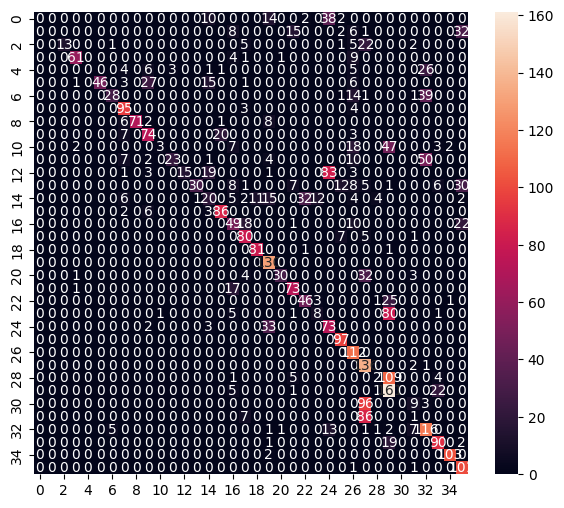

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        66
           1       0.00      0.00      0.00        64
           2       1.00      0.27      0.42        49
           3       0.92      0.80      0.86        76
           4       0.00      0.00      0.00        46
           5       1.00      0.46      0.63        99
           6       0.82      0.33      0.47        84
           7       0.73      0.93      0.82       102
           8       1.00      0.81      0.89        88
           9       0.61      0.71      0.65       104
          10       0.75      0.04      0.07        82
          11       0.88      0.24      0.37        97
          12       1.00      0.12      0.21       125
          13       0.97      0.28      0.43       108
          14       0.28      0.18      0.22       114
          15       0.80      0.89      0.84        97
          16       0.45      0.49      0.47       100
     

c:\Users\asusg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\asusg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\asusg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [26]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [27]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

AttributeError: 'Sequential' object has no attribute '_get_save_spec'

# 推論テスト

In [ ]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [ ]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [ ]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 0 ns


In [ ]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.7729778  0.16973573 0.05728643]
0
